In [1]:
from datetime import timedelta
import pandas

import swasputils

In [2]:
zoo_subjects = swasputils.ZooniverseSubjects()

In [3]:
SKIP_WORKFLOWS = {5214,17339,17444,17445}

In [4]:
retirement_counts = {}
for workflow_id, workflow_subjects in zoo_subjects.workflows.items():
    if workflow_id in SKIP_WORKFLOWS:
        continue
    retirement_dates = workflow_subjects.retired.df['retired_at']
    if len(retirement_dates.index) == 0:
        continue
    retirement_dates = retirement_dates.value_counts()
    retirement_dates.index = pandas.to_datetime(retirement_dates.index)
    retirement_dates.name = workflow_id
    retirement_counts[workflow_id] = retirement_dates.resample('1D').count()
retirement_counts = pandas.DataFrame(retirement_counts)

<AxesSubplot:title={'center':'Daily retirements (all-time)'}>

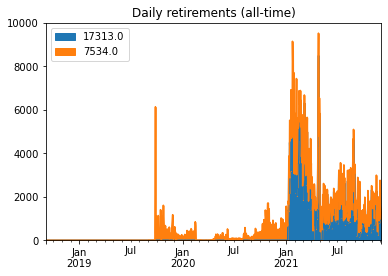

In [5]:
retirement_counts.plot.area(
    title='Daily retirements (all-time)',
)

<AxesSubplot:title={'center':'Daily retirements (last year)'}>

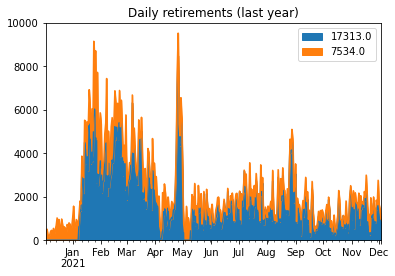

In [6]:
retirement_counts[
    retirement_counts.index >= (retirement_counts.index.max() - timedelta(days=365))
].plot.area(
    title='Daily retirements (last year)'
)

<AxesSubplot:title={'center':'Daily retirements (last 30 days)'}>

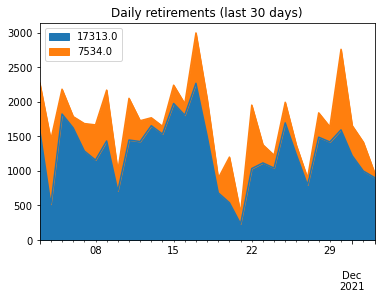

In [7]:
retirement_counts[
    retirement_counts.index >= (retirement_counts.index.max() - timedelta(days=30))
].plot.area(
    title='Daily retirements (last 30 days)'
)

<AxesSubplot:title={'center':'Daily retirements (last 30 days)'}>

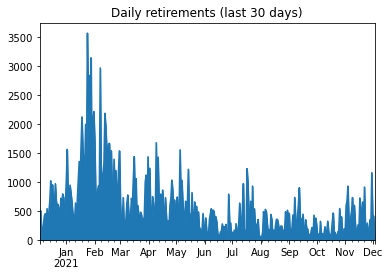

In [8]:
retirement_counts[swasputils.MAIN_WORKFLOW][
    retirement_counts.index >= (retirement_counts.index.max() - timedelta(days=365))
].plot.area(
    title='Daily retirements (last 30 days)'
)

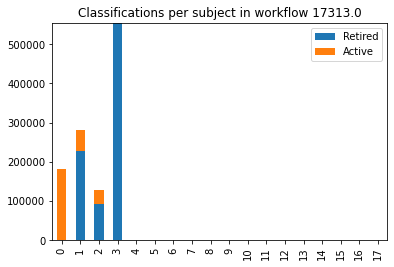

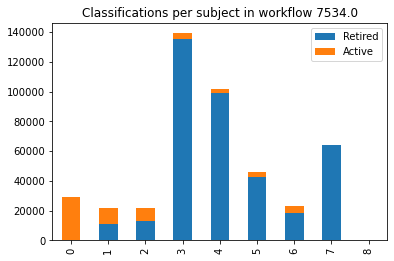

In [9]:
for workflow_id, workflow_subjects in zoo_subjects.workflows.items():
    if workflow_id in SKIP_WORKFLOWS:
        continue
    pandas.DataFrame({
        'Retired': workflow_subjects.retired.df['classifications_count'].value_counts(),
        'Active': workflow_subjects.active.df['classifications_count'].value_counts(),
    }).plot(
        title="Classifications per subject in workflow {}".format(workflow_id),
        stacked=True,
        kind='bar'
    )

In [10]:
total_count  = len(zoo_subjects.distinct.df)
retired_main_count = len(zoo_subjects.get_workflow(swasputils.MAIN_WORKFLOW).retired.df)
active_main_count = len(zoo_subjects.get_workflow(swasputils.MAIN_WORKFLOW).active.df)
remaining_main_count = total_count - retired_main_count
print(retired_main_count, active_main_count, remaining_main_count, float(remaining_main_count) / total_count * 100)
print(remaining_main_count/500)

383822 64178 1185339 75.53966737638777
2370.678
